# Seaborn

https://seaborn.pydata.org/

- statistic plotting library
- based on matplotlib
- beautiful styles and diagrams
- good pandas data-frame integration

In [17]:
import seaborn as sns
%matplotlib inline

#### Saborn example datasets
https://github.com/mwaskom/seaborn-data


In [18]:
tips = sns.load_dataset("tips")
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


# Distribution Plot

Combining:
- Histogram
- KDE - kernel density estimation


https://de.wikipedia.org/wiki/Nichtparametrische_Statistik

https://de.wikipedia.org/wiki/Kerndichtesch%C3%A4tzer

C:\Users\HAL9000\anaconda3\envs\data_science\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='total_bill', ylabel='Density'>

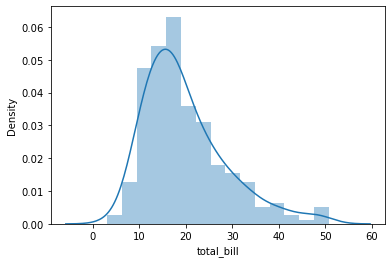

In [19]:
# Depricated
# combines kernel density estimation, KDE

sns.distplot(tips['total_bill'], kde=True, bins=15)

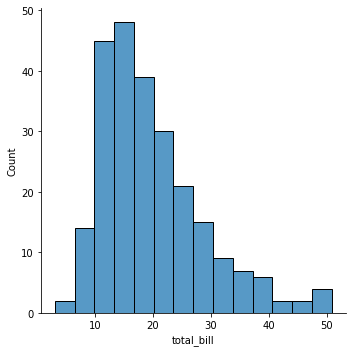

In [20]:
sns.displot(tips['total_bill'])
# sns.histplot(tips['total_bill'])

<AxesSubplot:xlabel='total_bill', ylabel='Density'>

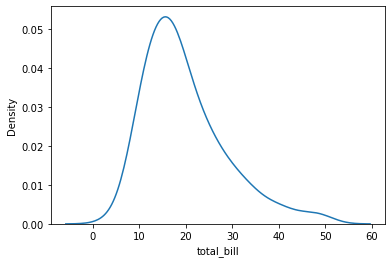

In [21]:
sns.kdeplot(data=tips, x="total_bill")

# Jointplot

Draw a plot of two variables with bivariate and univariate graphs.

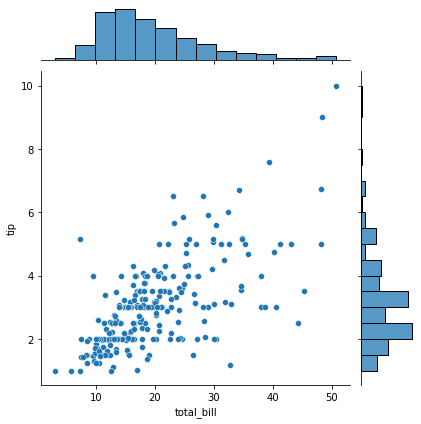

In [22]:
# Scatterplot
sns.jointplot(x="total_bill", y="tip", data=tips, kind="scatter")

## hex-plot

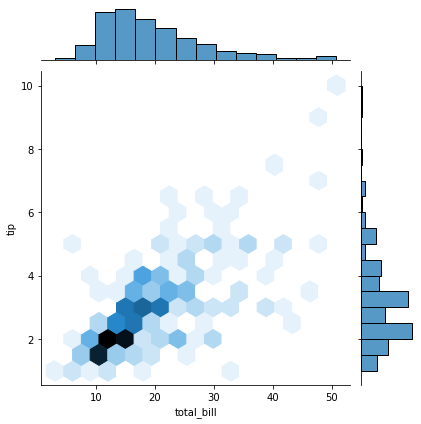

In [23]:
sns.jointplot(x="total_bill", y="tip", data=tips, kind="hex")

## Regression Plot

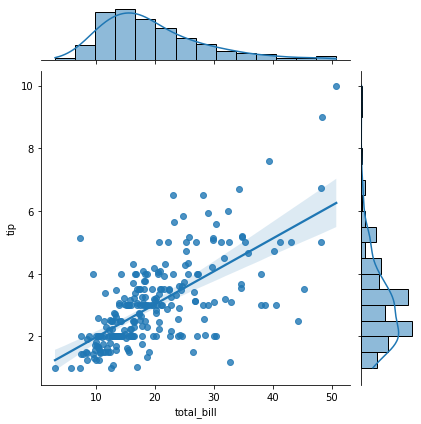

In [24]:
sns.jointplot(x="total_bill", y="tip", data=tips, kind="reg")

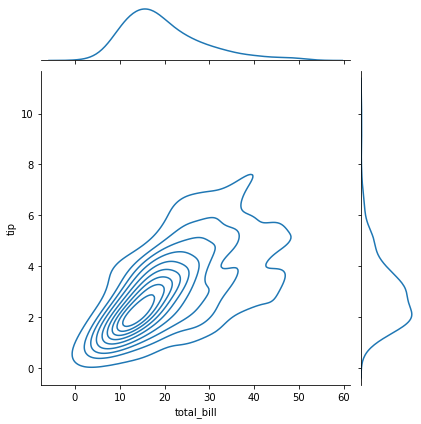

In [25]:
# sns.set(color_codes=True)
sns.jointplot(x="total_bill", y="tip", data=tips, kind="kde", )

# Pairplot

Plot pairwise relationships in a dataset.

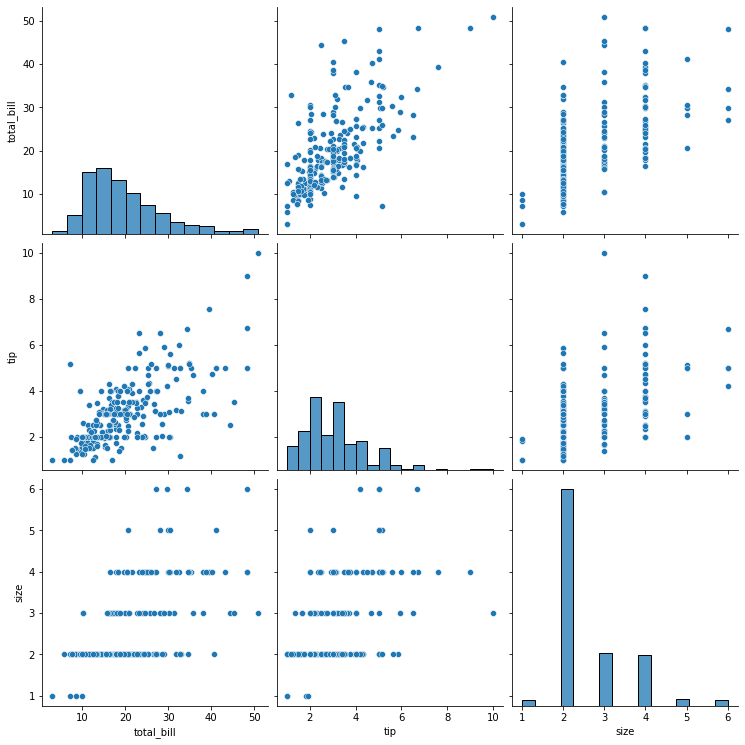

In [26]:
sns.pairplot(tips, height=3.5)

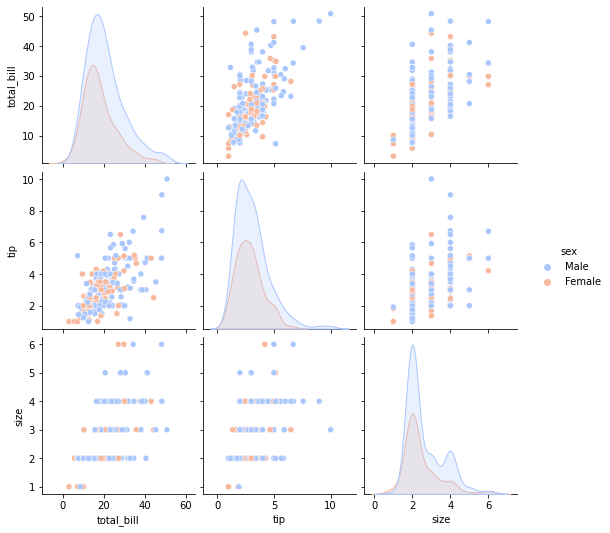

In [27]:
# "hue" to vary regarding atribute

sns.pairplot(tips, hue='sex', palette="coolwarm")

# Rugplot

<AxesSubplot:xlabel='total_bill'>

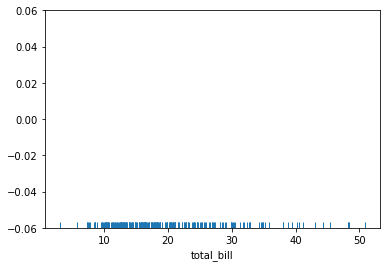

In [28]:
sns.rugplot(tips['total_bill'])

# KDE Plots

Substitutes each sample-data with Gaus(normal)distribution which is centered on respective sample-data

(0.0, 0.5)

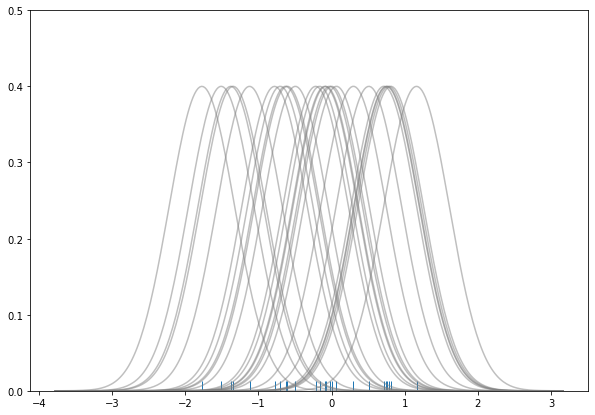

In [29]:
# Generate some diagramm
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
plt.figure(figsize=(10,7))

# create data-set
dataset = np.random.randn(25)

# plot with specifications
sns.rugplot(dataset)

x_min = dataset.min() - 2
x_max = dataset.max() + 2

# x-axis with 100 equidistant points in (x_min, x_max)
x_axis = np.linspace(x_min, x_max, 300)

# Bandwidth for kde
bandwidth = ((4*dataset.std()**5)/(3*len(dataset)))**.2

# Kernel - list
kernel_list = []

for datapoint in dataset:
    
    # Create kernels for each point
    kernel = stats.norm(datapoint, bandwidth).pdf(x_axis)
    kernel_list.append(kernel)
    
    #s Scaling for graphics
    kernel = kernel / kernel.max()
    kernel = kernel * .4
    
    plt.plot(x_axis, kernel, color = 'grey', alpha = 0.5)

plt.ylim(0, 0.5)


### Apply KDE for each single gausian-distributions

For the KDE-Plot we need to sum up this function

<AxesSubplot:>

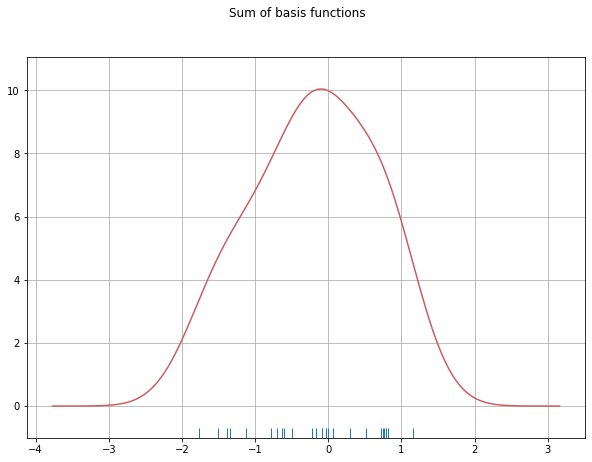

In [30]:
# to get KDE-Plot we have to sumof basefunctons
plt.figure(figsize=(10,7))
plt.grid(b=True, which='both')
# remove y-tick markers
# plt.yticks([])
plt.suptitle('Sum of basis functions')


sum_of_kde = np.sum(kernel_list, axis=0)

# show diagram
fig = plt.plot(x_axis, sum_of_kde, color='indianred')

# add first rugplot
sns.rugplot(dataset)


<AxesSubplot:xlabel='total_bill', ylabel='Density'>

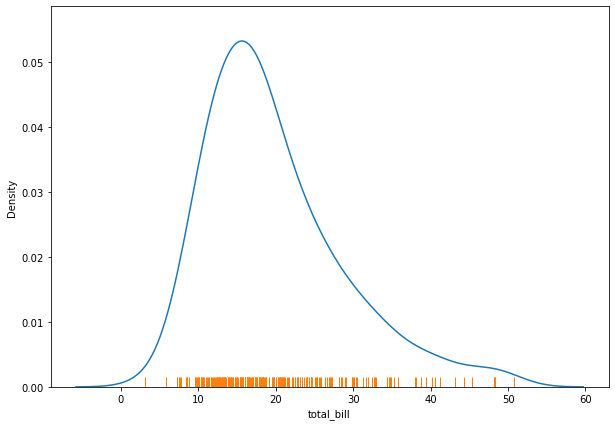

In [31]:
# Use on other data
plt.figure(figsize=(10,7))

sns.kdeplot(tips['total_bill'])
sns.rugplot(tips['total_bill'])



<AxesSubplot:xlabel='tip', ylabel='Density'>

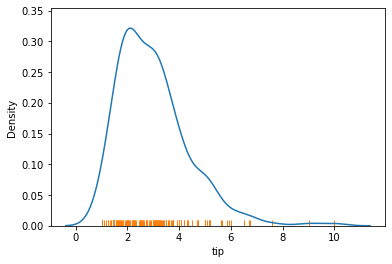

In [32]:
sns.kdeplot(tips['tip'])
sns.rugplot(tips['tip'])